# Car Price Prediction

##### Hi, 
###### Welcome to this jupyter notebook. The objective of this sheet is to best predict the cost of a vehicle using the attribute and value of other parameters using linear regression. The data used in this excercise has been taken from Kaggle (link below). 
https://www.kaggle.com/hellbuoy/car-price-prediction

## Prologue


### About project Mechanic of Machine Learning:
I have taken up a project to understand the in-depth mathematics involved in regularly used ML algorithms. Under this project, I will be sharing useful material and links as I explore this domain. Stay tuned to my git for updates. 

### Business Case: 
A top manufacturer of automobiles has realized the need to provide real time cost estimates to consumers when configuring their car through their website. Build an ML based model to facilitate this requirement
### Notebook objectives:

* To understand and implement linear regression 
* To visualize and understand the data
* To select features which can best predict costs based on attribute-value pair. 
* To derive conclusions from the data and suggest solutions for business.

### References:
* Linear Regression and Gradient Descent: https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=2
* Stochastic Gradient Descent: https://www.youtube.com/watch?v=vMh0zPT0tLI
* Gradient Descent: https://www.youtube.com/watch?v=sDv4f4s2SB8
* Notes and source code: 

## Index:
1. Exploratory Analysis and Visualization
2. Observations & Hypothesis
3. Linear regression: Training and Testing
4. Conclusion 

### Exploratory Analysis and Visualization

In [1]:
#Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
input_df = pd.read_csv('CarPrice_Assignment.csv')

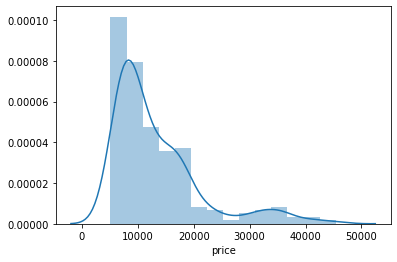

In [4]:
sns.distplot(input_df['price'],kde=True)

In [5]:
#Taking only progressing parameters as we only have linear regression models to fit. 
input_df = input_df[['symboling', 'wheelbase', 'carlength', 
                    'carwidth','carheight',  'curbweight',
                    'cylindernumber', 'enginesize','boreratio','stroke','compressionratio',
                    'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]

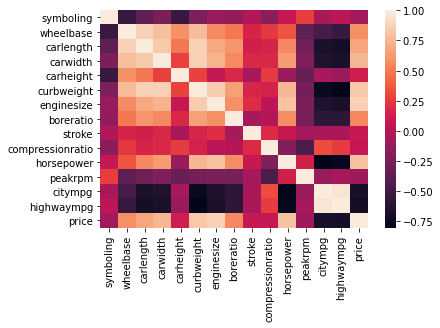

In [6]:
plt.show()
(sns.heatmap(input_df.corr()))

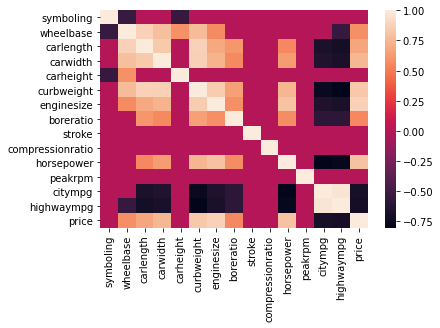

In [7]:
sns.heatmap(input_df.corr()[input_df.corr().apply(lambda x:x**2 )>.25].fillna(0))

In [8]:
print('High positive corelation with price:',list(input_df.corr()[(input_df.corr().apply(lambda x:x**2 )>.25 )&(input_df.corr()>0)]['price'].dropna().index))
print('High negative corelation with price:',list(input_df.corr()[(input_df.corr().apply(lambda x:x**2 )>.25 )&(input_df.corr()<0)]['price'].dropna().index))
pos_cor_list = list(input_df.corr()[(input_df.corr().apply(lambda x:x**2 )>.25 )&(input_df.corr()>0)]['price'].dropna().index)
neg_cor_list = list(input_df.corr()[(input_df.corr().apply(lambda x:x**2 )>.25 )&(input_df.corr()<0)]['price'].dropna().index)
to_keep_list = pos_cor_list + neg_cor_list

High positive corelation with price: ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']
High negative corelation with price: ['citympg', 'highwaympg']


In [9]:
input_df = input_df[to_keep_list]

In [ ]:
sns.pairplot(input_df,y_vars=input_df, x_vars=input_df['price'])
# input_df.shape

## Observations:

1. Following parameters are highly positively corelated with price:
    wheelbase, car length/base/height, curb weight, engine size, bore ratio & horsepower
2. Following parameters are highly negatively corelated with price:
    citympg,highwaympg